In [1]:
%matplotlib inline
import os
import sys
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import xarray as xr

In [2]:
import ftplib

In [3]:
from datetime import date, datetime, timedelta

In [4]:
from dateutil import parser

In [5]:
import salem

In [6]:
from subprocess import call

In [7]:
def list_files(ftp_connection):
    files = []
 
    def dir_callback(line):
        bits = line.split()
 
        if ('d' not in bits[0]):
            files.append(bits[-1])
 
    ftp_connection.dir(dir_callback)
    return files

In [8]:
dict_names = {'Palau':'Palau',
'Federated_States_of_Micronesia':'FSM',
'Guam':'Guam',
'Northern_Marianas':'Northern Marianas',
'Marshall_Islands':'Marshall Islands',
'Nauru':'Nauru',
'Kiribati_Gilbert_Islands':'Kiribati (Gilbert)',
'Kiribati_Phoenix_Islands':'Kiribati (Phoenix)',
'Kiribati_Line_Islands':'Kiribati (Line)',
'Papua_New_Guinea':'Papua New Guinea',
'Solomon_Islands':'Solomon Islands',
'New_Caledonia':'New Caledonia',
'Vanuatu_North':'Vanuatu North',
'Vanuatu_South':'Vanuatu South',
'Fiji':'Fiji',
'Tuvalu':'Tuvalu',
'Wallis_&_Futuna':'Wallis & Futuna',
'Tokelau':'Tokelau',
'Tonga':'Tonga',
'Samoa':'Samoa',
'American_Samoa':'American Samoa',
'Niue':'Niue',
'Northern_Cook_Islands':'Northern Cook Islands',
'Southern_Cook_Islands':'Southern Cook Islands',
'Society_Islands':'Society Islands',
'Austral_Islands':'Austral Islands',
'Tuamotu__Gambier_Islands':'Tuamotu/Gambier',
'Marquesas':'Marquesas',
'Pitcairn_Islands':'Pitcairn Islands'}

### download the CFSv2 outlook

In [34]:
today_UTC = date.today()

In [35]:
today_UTC

datetime.date(2018, 2, 2)

### connect to the FTP server, and retrieve the list of files in the last directory

In [36]:
ftp = ftplib.FTP("ftp.star.nesdis.noaa.gov")

In [37]:
ftp.login("anonymous", "anonymous")

'230 Anonymous access granted, restrictions apply'

In [39]:
ftp.cwd("pub/sod/mecb/crw/data/outlook/v4/nc/v1/outlook/{:%Y}".format(today_UTC))

'250 CWD command successful'

In [40]:
lfiles = list_files(ftp)

In [41]:
ftp.close()

### keep only the ones we want

In [42]:
lfiles = [x for x in lfiles if '060' in x]

In [43]:
def sort_files(f): 
    return int(f.split('_')[4][4:])

In [44]:
lfiles.sort(key=sort_files)

In [45]:
lfiles

['cfsv2_outlook-060perc_4mon-and-wkly_v4_icwk20180107_for_20180121to20180429.nc',
 'cfsv2_outlook-060perc_4mon-and-wkly_v4_icwk20180114_for_20180128to20180429.nc',
 'cfsv2_outlook-060perc_4mon-and-wkly_v4_icwk20180121_for_20180204to20180527.nc',
 'cfsv2_outlook-060perc_4mon-and-wkly_v4_icwk20180128_for_20180211to20180527.nc']

In [46]:
url = "ftp://ftp.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v4/nc/v1/outlook/{:%Y}/{}".format(today_UTC,lfiles[-1])

In [47]:
dates = url.split('_')[-1].split(".")[-2].split("to")

In [48]:
dates

['20180211', '20180527']

In [49]:
dates = list(map(parser.parse, dates))

In [50]:
dates_range = pd.date_range(start=dates[0], freq='7d', periods=12)

In [51]:
dates_range

DatetimeIndex(['2018-02-11', '2018-02-18', '2018-02-25', '2018-03-04',
               '2018-03-11', '2018-03-18', '2018-03-25', '2018-04-01',
               '2018-04-08', '2018-04-15', '2018-04-22', '2018-04-29'],
              dtype='datetime64[ns]', freq='7D')

In [52]:
opath = "/Volumes/GDATA/data/CRW/outlook/"

In [53]:
filename = url.split("/")[-1]

In [54]:
filename

'cfsv2_outlook-060perc_4mon-and-wkly_v4_icwk20180128_for_20180211to20180527.nc'

In [55]:
download = True

In [56]:
if download:
    cmd = "curl --silent {} -o {}/{}".format(url, opath, filename)
    r = call(cmd, shell=True)

In [57]:
dset = xr.open_dataset(os.path.join(opath, filename))

In [58]:
dset

<xarray.Dataset>
Dimensions:            (lat: 360, lon: 720, time: 1)
Coordinates:
  * time               (time) datetime64[ns] 2018-02-04T12:00:00
  * lat                (lat) float32 89.75 89.25 88.75 88.25 87.75 87.25 ...
  * lon                (lon) float32 0.25 0.75 1.25 1.75 2.25 2.75 3.25 3.75 ...
Data variables:
    surface_flag       (lat, lon) int8 ...
    CRW_BAA_FourMonth  (time, lat, lon) float64 ...
    CRW_BAA_Week_01    (time, lat, lon) float64 ...
    CRW_BAA_Week_02    (time, lat, lon) float64 ...
    CRW_BAA_Week_03    (time, lat, lon) float64 ...
    CRW_BAA_Week_04    (time, lat, lon) float64 ...
    CRW_BAA_Week_05    (time, lat, lon) float64 ...
    CRW_BAA_Week_06    (time, lat, lon) float64 ...
    CRW_BAA_Week_07    (time, lat, lon) float64 ...
    CRW_BAA_Week_08    (time, lat, lon) float64 ...
    CRW_BAA_Week_09    (time, lat, lon) float64 ...
    CRW_BAA_Week_10    (time, lat, lon) float64 ...
    CRW_BAA_Week_11    (time, lat, lon) float64 ...
    CRW_BAA

In [59]:
dset = dset.squeeze()

In [60]:
dset

<xarray.Dataset>
Dimensions:            (lat: 360, lon: 720)
Coordinates:
    time               datetime64[ns] 2018-02-04T12:00:00
  * lat                (lat) float32 89.75 89.25 88.75 88.25 87.75 87.25 ...
  * lon                (lon) float32 0.25 0.75 1.25 1.75 2.25 2.75 3.25 3.75 ...
Data variables:
    surface_flag       (lat, lon) int8 ...
    CRW_BAA_FourMonth  (lat, lon) float64 ...
    CRW_BAA_Week_01    (lat, lon) float64 ...
    CRW_BAA_Week_02    (lat, lon) float64 ...
    CRW_BAA_Week_03    (lat, lon) float64 ...
    CRW_BAA_Week_04    (lat, lon) float64 ...
    CRW_BAA_Week_05    (lat, lon) float64 ...
    CRW_BAA_Week_06    (lat, lon) float64 ...
    CRW_BAA_Week_07    (lat, lon) float64 ...
    CRW_BAA_Week_08    (lat, lon) float64 ...
    CRW_BAA_Week_09    (lat, lon) float64 ...
    CRW_BAA_Week_10    (lat, lon) float64 ...
    CRW_BAA_Week_11    (lat, lon) float64 ...
    CRW_BAA_Week_12    (lat, lon) float64 ...
    CRW_BAA_Week_13    (lat, lon) float64 ...
    CRW

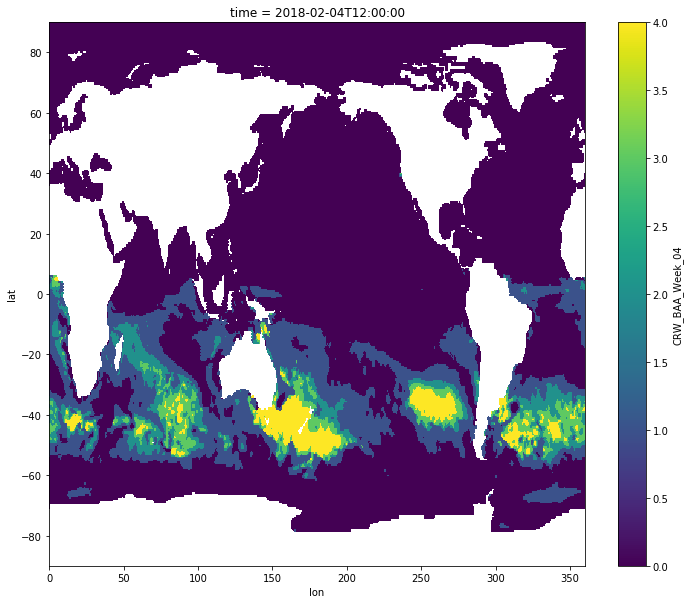

In [63]:
f, ax = plt.subplots(figsize=(12,10))
dset['CRW_BAA_Week_04'].plot(ax=ax)

In [64]:
dset = dset.sel(lon=slice(100, 300), lat=slice(50, -50))

In [65]:
variables = ["CRW_BAA_Week_{:02d}".format(x) for x in range(2, 14)]

In [66]:
variables

['CRW_BAA_Week_02',
 'CRW_BAA_Week_03',
 'CRW_BAA_Week_04',
 'CRW_BAA_Week_05',
 'CRW_BAA_Week_06',
 'CRW_BAA_Week_07',
 'CRW_BAA_Week_08',
 'CRW_BAA_Week_09',
 'CRW_BAA_Week_10',
 'CRW_BAA_Week_11',
 'CRW_BAA_Week_12',
 'CRW_BAA_Week_13']

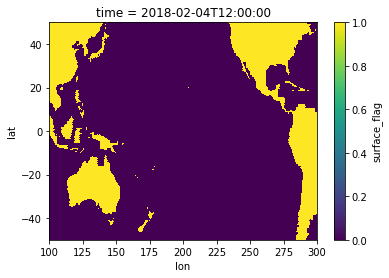

In [67]:
dset['surface_flag'].plot()

+ Satellite
```
 200 250 250    No Stress       (very light blue)
 255 240   0    Watch           (Yellow)     
 250 170  10    Warning         (Orange)
 240   0   0    Alert Level 1   (Red)
 150   0   0    Alert Level 2   (Dark Red)
```

+ Outlook
```
 200 250 250    No Stress       (very light blue)
 255 210 160    Watch           (Beige)      
 250 170  10    Warning         (Orange)
 240   0   0    Alert Level 1   (Red)
 150   0   0    Alert Level 2   (Dark Red)
``` 

In [70]:
outlooks_rgb = [[200, 250, 250], [255, 210, 160], [250, 170, 10], [240, 0, 0], [150, 0, 0]]

In [73]:
def rgb2hex(r,g,b): 
    
    def clamp(x): 
        return max(0, min(x, 255))
    
    h = "#{0:02x}{1:02x}{2:02x}".format(clamp(r), clamp(g), clamp(b))
    
    return h

In [78]:
hex_codes = [rgb2hex(*x) for x in outlooks_rgb]

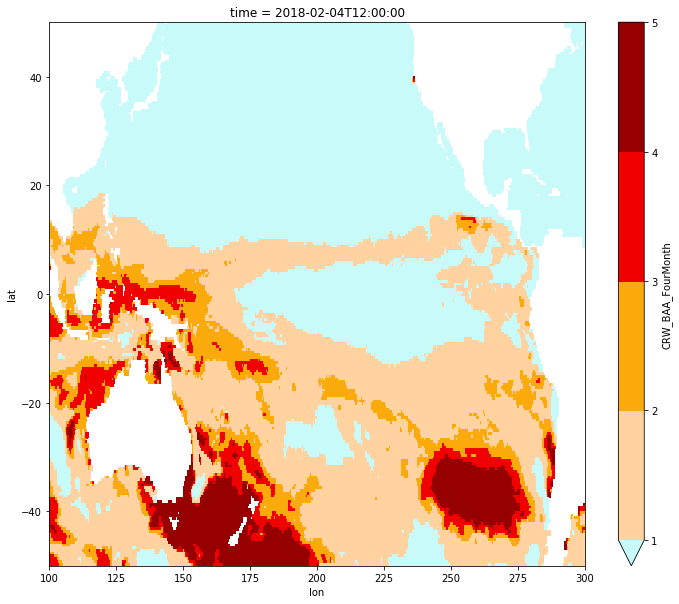

In [81]:
f, ax = plt.subplots(figsize=(12,10))
dset['CRW_BAA_FourMonth'].plot(ax=ax, levels=[1, 2, 3, 4, 5], colors=hex_codes)

In [82]:
dset = dset[variables]

In [83]:
l = [] 
for v in variables: 
    d = dset[v]
    d.name = 'CRW_BAA'
    l.append(d)

In [84]:
dset = xr.concat(l, dim='time')

In [85]:
dset['time'] = (('time'), dates_range)

In [86]:
dset

<xarray.DataArray 'CRW_BAA' (time: 12, lat: 200, lon: 400)>
array([[[ nan,  nan, ...,   0.,   0.],
        [ nan,  nan, ...,   0.,   0.],
        ..., 
        [  1.,   1., ...,   1.,   1.],
        [  1.,   1., ...,   1.,   1.]],

       [[ nan,  nan, ...,   0.,   0.],
        [ nan,  nan, ...,   0.,   0.],
        ..., 
        [  2.,   1., ...,   0.,   1.],
        [  2.,   1., ...,   0.,   1.]],

       ..., 
       [[ nan,  nan, ...,   0.,   0.],
        [ nan,  nan, ...,   0.,   0.],
        ..., 
        [  3.,   3., ...,   0.,   0.],
        [  3.,   3., ...,   0.,   0.]],

       [[ nan,  nan, ...,   0.,   0.],
        [ nan,  nan, ...,   0.,   0.],
        ..., 
        [  0.,   0., ...,   0.,   0.],
        [  0.,   0., ...,   0.,   0.]]])
Coordinates:
  * lon      (lon) float32 100.25 100.75 101.25 101.75 102.25 102.75 103.25 ...
  * lat      (lat) float32 49.75 49.25 48.75 48.25 47.75 47.25 46.75 46.25 ...
  * time     (time) datetime64[ns] 2018-02-11 2018-02-18 2018-02-25

In [87]:
from glob import glob

In [88]:
lfiles = glob("../shapefiles/shapes_*_converted.shp")

In [89]:
lfiles

['../shapefiles/shapes_Nauru_converted.shp',
 '../shapefiles/shapes_Northern_Cook_Islands_converted.shp',
 '../shapefiles/shapes_Pitcairn_Islands_converted.shp',
 '../shapefiles/shapes_Tonga_converted.shp',
 '../shapefiles/shapes_Niue_converted.shp',
 '../shapefiles/shapes_Kiribati_Gilbert_Islands_converted.shp',
 '../shapefiles/shapes_Wallis_&_Futuna_converted.shp',
 '../shapefiles/shapes_Marshall_Islands_converted.shp',
 '../shapefiles/shapes_Vanuatu_North_converted.shp',
 '../shapefiles/shapes_New_Caledonia_converted.shp',
 '../shapefiles/shapes_Palau_converted.shp',
 '../shapefiles/shapes_Austral_Islands_converted.shp',
 '../shapefiles/shapes_Tuamotu__Gambier_Islands_converted.shp',
 '../shapefiles/shapes_Vanuatu_South_converted.shp',
 '../shapefiles/shapes_Samoa_converted.shp',
 '../shapefiles/shapes_Guam_converted.shp',
 '../shapefiles/shapes_Northern_Marianas_converted.shp',
 '../shapefiles/shapes_Southern_Cook_Islands_converted.shp',
 '../shapefiles/shapes_Solomon_Islands_conve

In [90]:
dates_e = []
df_dates = []
for t in range(len(dset.time)): 
    df_country = {}
    dset_w = dset.isel(time=t)
    dates_e.append(pd.to_datetime(dset_w.time.data))
    for f in lfiles:
        country_name = f.split('/')[-1].split(".")[-2].replace("shapes_","").replace("_converted","")
#         print("processing {}".format(country_name))
        sh_country = salem.read_shapefile(f)
        d_subset = dset_w.salem.subset(shape=sh_country, margin=2)
        d_subset_roi = d_subset.salem.roi(shape=sh_country) 
        d_subset_roi_stacked = d_subset_roi.stack(z=('lat','lon'))
        df = d_subset_roi_stacked.to_dataframe() 
        df = df.dropna()
        summary_df = df.describe(percentiles=[0.1, 0.25, 0.5, 0.6, 0.7, 0.8, 0.9])
        df_country[country_name] = int(summary_df.loc['90%',:][0])
#     df_dates.append(pd.DataFrame(df_country, index=["{:%Y-%m-%d}".format(pd.to_datetime(dset_w.time.data))]))
    df_dates.append(pd.DataFrame(df_country, index=[pd.to_datetime(dset_w.time.data)]))

In [91]:
df = pd.concat(df_dates, axis=0)

In [60]:
df

,American_Samoa,Austral_Islands,Federated_States_of_Micronesia,Fiji,Guam,Kiribati_Gilbert_Islands,Kiribati_Line_Islands,Kiribati_Phoenix_Islands,Marquesas,Marshall_Islands,...,Society_Islands,Solomon_Islands,Southern_Cook_Islands,Tokelau,Tonga,Tuamotu__Gambier_Islands,Tuvalu,Vanuatu_North,Vanuatu_South,Wallis_&_Futuna
2018-01-14,1,0,0,1,0,0,0,0,0,0,...,1,2,1,0,1,1,1,1,1,1
2018-01-21,2,1,0,2,0,0,0,0,0,0,...,1,3,1,1,1,1,1,1,1,2
2018-01-28,2,1,0,2,0,0,0,0,0,0,...,1,3,1,1,2,1,1,1,1,2
2018-02-04,2,1,0,2,0,0,0,0,0,0,...,1,3,2,1,2,1,2,2,2,2
2018-02-11,2,1,0,3,0,0,0,0,0,0,...,1,3,2,1,2,1,2,2,2,3
2018-02-18,3,1,0,3,0,0,0,0,0,0,...,1,3,2,0,2,1,1,2,2,3
2018-02-25,3,1,0,3,0,0,0,0,0,0,...,2,3,2,0,3,1,1,2,2,3
2018-03-04,3,2,0,3,0,0,0,0,0,0,...,2,3,2,0,3,2,1,2,3,3
2018-03-11,3,2,0,3,0,0,0,0,0,0,...,2,3,3,0,3,2,1,2,3,3
2018-03-18,3,2,0,3,0,0,0,0,0,0,...,2,3,3,0,3,2,1,3,3,3


In [61]:
df_max = df.groupby(df.index.month).max()

In [62]:
df_max

,American_Samoa,Austral_Islands,Federated_States_of_Micronesia,Fiji,Guam,Kiribati_Gilbert_Islands,Kiribati_Line_Islands,Kiribati_Phoenix_Islands,Marquesas,Marshall_Islands,...,Society_Islands,Solomon_Islands,Southern_Cook_Islands,Tokelau,Tonga,Tuamotu__Gambier_Islands,Tuvalu,Vanuatu_North,Vanuatu_South,Wallis_&_Futuna
1,2,1,0,2,0,0,0,0,0,0,...,1,3,1,1,2,1,1,1,1,2
2,3,1,0,3,0,0,0,0,0,0,...,2,3,2,1,3,1,2,2,2,3
3,3,2,0,3,0,0,0,0,0,0,...,2,3,3,0,3,2,1,3,3,3
4,4,2,0,3,0,0,0,0,0,0,...,2,3,3,0,3,2,1,3,0,4


### uncomment the following if the month is December 

In [90]:
# df_max = df_max.reindex([12,1,2])

In [91]:
!ls /Volumes/GDATA/data/CRW/outlook/

cfsv2_outlook-060perc_4mon-and-wkly_v4_icwk20171126_for_20171210to20180325.nc
cfsv2_outlook-060perc_4mon-and-wkly_v4_icwk20171210_for_20171224to20180325.nc
cfsv2_outlook-060perc_4mon-and-wkly_v4_icwk20171231_for_20180114to20180429.nc
cfsv2_outlook-100perc_4mon-and-wkly_v4_icwk20171231_for_20180114to20180429.nc


In [70]:
df_max

,American_Samoa,Austral_Islands,Federated_States_of_Micronesia,Fiji,Guam,Kiribati_Gilbert_Islands,Kiribati_Line_Islands,Kiribati_Phoenix_Islands,Marquesas,Marshall_Islands,...,Society_Islands,Solomon_Islands,Southern_Cook_Islands,Tokelau,Tonga,Tuamotu__Gambier_Islands,Tuvalu,Vanuatu_North,Vanuatu_South,Wallis_&_Futuna
1,2,1,0,2,0,0,0,0,0,0,...,1,3,1,1,2,1,1,1,1,2
2,3,1,0,3,0,0,0,0,0,0,...,2,3,2,1,3,1,2,2,2,3
3,3,2,0,3,0,0,0,0,0,0,...,2,3,3,0,3,2,1,3,3,3
4,4,2,0,3,0,0,0,0,0,0,...,2,3,3,0,3,2,1,3,0,4


In [72]:
df_max.columns = [dict_names[x] for x in df_max.columns]

In [73]:
df_max

,American Samoa,Austral Islands,FSM,Fiji,Guam,Kiribati (Gilbert),Kiribati (Line),Kiribati (Phoenix),Marquesas,Marshall Islands,...,Society Islands,Solomon Islands,Southern Cook Islands,Tokelau,Tonga,Tuamotu/Gambier,Tuvalu,Vanuatu North,Vanuatu South,Wallis & Futuna
1,2,1,0,2,0,0,0,0,0,0,...,1,3,1,1,2,1,1,1,1,2
2,3,1,0,3,0,0,0,0,0,0,...,2,3,2,1,3,1,2,2,2,3
3,3,2,0,3,0,0,0,0,0,0,...,2,3,3,0,3,2,1,3,3,3
4,4,2,0,3,0,0,0,0,0,0,...,2,3,3,0,3,2,1,3,0,4


In [74]:
df_max.T.to_csv('../outputs/CSFV2_outlook_monthly_90th_per_summary_table_from_{:%Y%m%d}.csv'.format(dates_range[0]))

In [78]:
df.columns = [dict_names[x] for x in df.columns]

In [79]:
df

,American Samoa,Austral Islands,FSM,Fiji,Guam,Kiribati (Gilbert),Kiribati (Line),Kiribati (Phoenix),Marquesas,Marshall Islands,...,Society Islands,Solomon Islands,Southern Cook Islands,Tokelau,Tonga,Tuamotu/Gambier,Tuvalu,Vanuatu North,Vanuatu South,Wallis & Futuna
2018-01-14,1,0,0,1,0,0,0,0,0,0,...,1,2,1,0,1,1,1,1,1,1
2018-01-21,2,1,0,2,0,0,0,0,0,0,...,1,3,1,1,1,1,1,1,1,2
2018-01-28,2,1,0,2,0,0,0,0,0,0,...,1,3,1,1,2,1,1,1,1,2
2018-02-04,2,1,0,2,0,0,0,0,0,0,...,1,3,2,1,2,1,2,2,2,2
2018-02-11,2,1,0,3,0,0,0,0,0,0,...,1,3,2,1,2,1,2,2,2,3
2018-02-18,3,1,0,3,0,0,0,0,0,0,...,1,3,2,0,2,1,1,2,2,3
2018-02-25,3,1,0,3,0,0,0,0,0,0,...,2,3,2,0,3,1,1,2,2,3
2018-03-04,3,2,0,3,0,0,0,0,0,0,...,2,3,2,0,3,2,1,2,3,3
2018-03-11,3,2,0,3,0,0,0,0,0,0,...,2,3,3,0,3,2,1,2,3,3
2018-03-18,3,2,0,3,0,0,0,0,0,0,...,2,3,3,0,3,2,1,3,3,3


In [81]:
df.T.to_csv('../outputs/CSFV2_outlook_weekly_90th_per_summary_table_from_{:%Y%m%d}.csv'.format(dates_range[0]))

In [83]:
ls ../outputs/CSFV2_outlook_weekly_90th_per_summary_table_from*

../outputs/CSFV2_outlook_weekly_90th_per_summary_table_from_20171210.csv
../outputs/CSFV2_outlook_weekly_90th_per_summary_table_from_20180114.csv
../outputs/CSFV2_outlook_weekly_90th_per_summary_table_from__20180114.csv


In [85]:
dates_range[0]

Timestamp('2018-01-14 00:00:00', freq='7D')

In [86]:
dates_range

DatetimeIndex(['2018-01-14', '2018-01-21', '2018-01-28', '2018-02-04',
               '2018-02-11', '2018-02-18', '2018-02-25', '2018-03-04',
               '2018-03-11', '2018-03-18', '2018-03-25', '2018-04-01'],
              dtype='datetime64[ns]', freq='7D')